#### DNN CNN
    - 독립적인 정보
    - 입력(x) 간의 순서나 연관성을 고려하지 않는다
#### 시계열 : 시간의 연속적인 흐름
    - 시계열 데이터 : 날씨 , 주식 , 문장 --> 순서가 중요한 데이터 / 이전 데이터에 영향을 많이 받음.
### RNN
    - 순환하는 구조 (시간의 순서가 굉장히 중요 ! )
    - 시점1 (월요일) : 맑음 (x1) 새로운 정보가 RNN에 들어옴 
        - > RNN날씨가 맑음(h1)이라는 요약본을 생성
    - 시점2 (화요일) : 흐림 (x2) 새로운 정보가 RNN에 들어옴 
        - > RNN날씨가 흐림(h2)이라는 요약본을 생성 + 어제의 기억 (맑음(h1)) 즉, h1 + h2 함께 고려하여 어제 맑았는데 오늘 흐림이라는 h2이라는 새로운 요약본을 생성
    - 시점3 (수요일) : 비 (x3) 새로운 정보가 RNN에 들어옴 
        - > RNN날씨가 비옴(h3)이라는 요약본 생성 + 어제의 기억 (맑음(h1)+흐림(h2))
    - 알고리즘
        - 1. 각 시점(time step)에서 현재의 입력과 과거의 기억을 받아서 처리
        - 2. (hidden state ht-1) 받아서 현재의 결과물과 다음 시점으로 넘겨줄 최신기억 ht를 생성 
            - ht 기억이 시계열 데이터의 맥락(Context) 저장하는 역할
    - 장점
        - 순서가 있는 데이터의 맥락을 학습할 수 있음.
        - 유연한 구조
    - 단점
        - 매실을 타서 먹고 물 부어서 다시 먹고 하다보면 맛이 연해짐. 즉 새로운 정보를 계속 추가 할수록 희석되어 연해진다.
        - 즉, 새로운 정보가 계속 반복적으로 들어온다면 기억력이 흐려지면서 짧아진다.
        - 시계열 데이터가 길어지면 이전 정보가 소실되거나 반대로 너무 강해져서 폭주되어 재대로 된 학습이 안됨.(Gradient 와 비슷함)
        - 장기기억 의존성 문제가 생김 (Long-Term Dependency Problem)
    - 계산방법
        - LSTM 과 GRU 가 나옴
        - 은닉상태 계산
            - h1 = tanh(w*h*t - 1 + w*x*t - b*h)
        - 출력계산
            - 
#### LSTM & GRU
    - LSTM(Long Short-Term Memmory)
        - RNN 내부에 게이트(Gate)라는 굉장히 복잡한 장치가 있다. 이 장치는 잊고, 기억할 정보를 관리한다.
    - GRU (Gated Recurrent Unit)
        - LSTM 구조를 좀 더 단순화 시킨 모델로 LSTM 성능과 비슷하지만 속도는 빠르다.

    

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/time_data_train.csv'
import pandas as pd
df = pd.read_csv(url)
df.head()


,Date,Open,High,Low,Volume,Close
0,2015-12-16,120,123,118,13181000,123
1,2015-12-17,124,126,122,17284900,123
2,2015-12-18,121,122,118,17948100,118
3,2015-12-21,120,120,116,11670000,117
4,2015-12-22,117,117,115,9689000,116


In [3]:
# 전체 데이터셋 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    967 non-null    object
 1   Open    967 non-null    int64 
 2   High    967 non-null    int64 
 3   Low     967 non-null    int64 
 4   Volume  967 non-null    int64 
 5   Close   967 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 45.5+ KB


In [4]:
# EDA - 탐색적 데이터 분석

In [5]:
# %pip install torch torchvision

In [6]:
# 데이터 셋 정의
import numpy as np
import torch
from torch.utils.data.dataset import Dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler

class StockDataSet(Dataset):
    def __init__(self):
        url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/time_data_train.csv'
        self.csv = pd.read_csv(url)
        data = self.csv.iloc[: , 1:-1].values
        label = self.csv.iloc[:,-1].values.reshape(-1,1)
        self.data = StandardScaler().fit_transform( data)
        # 정답이 숫자 크다면 정규화가 학습에 도움이된다.
        self.label = StandardScaler().fit_transform(label)
        self.data = torch.Tensor(self.data)
        self.label = torch.Tensor(self.label)
    def __len__(self):
        return len(self.data) - 30  # 사용가능한 배치 개수
    def __getitem__(self, index):
        data = self.data[index: index + 30]
        label = self.label[index + 30]
        return data, label
        

In [7]:
# df.iloc[:,-1].values.reshape(-1,1).shape
# .view() 와 .reshape() 배열 모양을 바꾸는거임. permute()를 써서 배열의 위치를 정렬

In [8]:
# df.iloc[: , 1:-1].values.shape #967개의 4개의 컬럼(학습에 필요한 속성갯수임)이 있음

In [9]:
data, label = next(iter(StockDataSet()))
data.size(), label.size()

(torch.Size([30, 4]), torch.Size([1]))

In [10]:
import torch
import torch.nn as nn
class StockRNN(nn.Module):
    def __init__(self):
        super(StockRNN,self).__init__()
        # (30일, 배치16개 , 각 입력의 특성 4개)  batch_first = False
        # (배치16개, 30일 각 입력의 특성 4) batch_first = True
        self.rnn = nn.RNN(input_size=4, hidden_size=8,num_layers=5,batch_first=True)
        # 출력 (batch, 30 , 8)
        self.fc1 = nn.Linear(30*8,64)
        self.fc2 = nn.Linear(64,1)
        self.relu = nn.ReLU()
    def forward(self,x,h_zero):  # 입력데이터는 (16,30,4)
        # ho 는 초기 은닉상태 (num_layers, batch,hidden_size)  (5,16,8)        
        # 출력 x는 모든 시점에 대한 hidden output을 담고 있어야.. (batch,seq_len,hidden_size) (16,30,8)
        # 출력 hn 최종은닉상태(각레이어의 마지막 타임스템프 hidden state) (num_layer,batch,hidden_sate)(5,16,8)
        x,hn =  self.rnn(x,h_zero) 
        # mlp 입력으로 사용될수 있도록 모양 변경
        x = torch.reshape(x, (x.shape[0],-1))

        # mlp 
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        # 예측한 종가 1차원 벡터
        out = torch.flatten(x)
        return out


In [11]:
import torch
import torch.nn as nn

rnn = StockRNN()
sample_data = torch.randn(16,30,4 )
# 초기 hidden state 값  (num_layer, batch_size, hidden_size)  (5,16,8)
h_zero = torch.zeros(5,16,8)
out = rnn(sample_data,h_zero)
out.size()

torch.Size([16])

In [12]:
from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = StockRNN().to(device)
dataset = StockDataSet()
loader = DataLoader(dataset,batch_size=16)
optim = Adam(model.parameters(), lr=1e-3)

In [13]:
data , label = next(iter(loader))
type(data)
data.dtype , label.dtype # int , float no..

(torch.float32, torch.float32)

In [14]:
# Expected hidden size (5, 9, 8), got [5, 16, 8]
# Rnn이 처리하는 배치크기는 9  우리가 설계한 ho 16
print(len(dataset) % 25)
# 마지막 배치가 개수가 모라자서 9

12


In [15]:
from tqdm import tqdm
# criterian = nn.MSELoss()
for epoch in range(200):
    loop = tqdm(loader)
    for data, label in loop:
        optim.zero_grad()
        # 초기 은닉상태의 배치크기는 DataLoader가 주는 배치 크기
        batch_size = data.size(0)

        h_zero = torch.zeros(5,batch_size,8).to(device)
        # 모델의 예측값
        pred = model(data.to(device), h_zero)
        # 손실값
        loss = nn.MSELoss()(pred, label.to(device))
        #역전파를 위한 torch모델들은 변수로 설정하지 않는 이상 밖에 다시 줘야함
        loss.backward()
        optim.step()# 값을 저장

        loop.set_description(f'epoch:{epoch+1} loss:{loss.item()}')
torch.save(model.state_dict(), './rnn.pth')#가중치만 저장됨
    

  0%|          | 0/59 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.13/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch:1 loss:0.053541362285614014:  86%|████████▋ | 51/59 [00:00<00:00, 253.30it/s] /opt/anaconda3/lib/python3.13/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([9, 1])) that is different to the input size (torch.Size([9])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch:200 loss:0.006159891374409199: 100%|██████████| 59/59 [00:00<00:00, 286.06it/s] 


In [16]:
# 모델 성능평가하기
import matplotlib.pyplot as plt

loader = DataLoader(dataset,batch_size=1)
preds = []
total_loss = 0
with torch.no_grad():
    model.load_state_dict(torch.load('rnn.pth', map_location=device,weights_only=False))
    for data, label in loader:
        # 초기 은닉상태의 배치크기는 DataLoader가 주는 배치 크기
        batch_size = data.size(0)

        ho = torch.zeros(5,batch_size,8).to(device)
        # 모델의 예측값
        pred = model(data.to(device), ho)
        preds.append(pred.item())
        # 손실값
        loss = nn.MSELoss()(pred, label.to(device))
        total_loss += (loss.item() / len(loader))

print(f'total_loss : {total_loss:.4f}')

/opt/anaconda3/lib/python3.13/site-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


total_loss : 0.0143


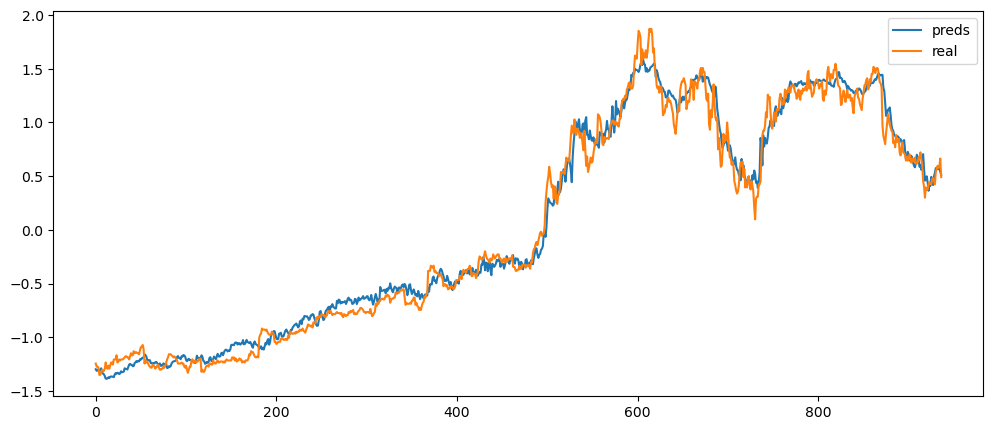

In [17]:
plt.figure(figsize=(12,5))
plt.plot(preds,label='preds')
plt.plot(dataset.label[30:], label = 'real')
plt.legend()
plt.show() 

In [ ]:
with torch.no_grad():
    last_30 = df.iloc[-30:,1:-1].values
    X = torch.tensor(last_30).unsqueeze(0).size()
    # 
    h_zero = torch.zeros(5,1,8).to(device) 
    pred = model(X.to(device),h_zero)
    print(pred.item())

In [ ]:
# yfinance
X = np.array([
    [10,20],[100,200]
])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
scaler.inverse_transform(X_scaled)

In [19]:
%pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 4.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.7 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=c2397a4edb675465d1e94c9c56ca1357be7ced86c5ce0d197d18b4c7d655000a
  Stored in direct

In [ ]:
import yfinance as yf
dat = yf.Ticker("MSFT") # yfinance는 야후 파이낸스(Yahoo Finance) 에서 주식, 환율, 암호화폐, ETF 등 금융 데이터를 자동으로 불러오는 라이브러리
dat.history(period='1y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-29 00:00:00-04:00,424.810745,429.942234,422.627126,428.731323,17644100,0.0,0.0
2024-10-30 00:00:00-04:00,434.180393,435.232492,428.880188,429.306976,29749100,0.0,0.0
2024-10-31 00:00:00-04:00,412.264893,413.058949,403.272406,403.322052,53971000,0.0,0.0
2024-11-01 00:00:00-04:00,405.962222,412.403851,404.463464,407.312073,24230400,0.0,0.0
2024-11-04 00:00:00-05:00,406.746301,407.361707,402.547841,405.416290,19672300,0.0,0.0
...,...,...,...,...,...,...,...
2025-10-22 00:00:00-04:00,521.150024,525.229980,517.710022,520.539978,18962700,0.0,0.0
2025-10-23 00:00:00-04:00,522.460022,523.950012,518.609985,520.559998,14023500,0.0,0.0
2025-10-24 00:00:00-04:00,522.789978,525.349976,520.710022,523.609985,15532400,0.0,0.0


In [ ]:
# 독립변수 , 종속변수 분리해보자
# window size는 30 (한달치 데이터를 하나의 dataset으로 보자)
# batch는 3batch
# 알고리즘은 RNN